## 读取数据

In [12]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

data_path = '../data/iris.data'

def Iris_label(s):
    # .data文件的字符串是二进制形式的(因为被压缩过)
    it = {b'Iris-setosa': 0,
          b'Iris-versicolor': 1,
          b'Iris-virginica': 2}
    return it[s]

# converter将指定string类型的列用指定函数转换为对应数值
data = np.loadtxt(data_path, 
                  dtype=float,
                  delimiter=',',
                  converters={4:Iris_label})
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

## 划分训练集和测试集(没有验证集)

In [13]:
# 分割数据和标签
# indices_or_sections指定分割位置
x, y = np.split(data, indices_or_sections=(4, ), axis=1)

# 只要前两列数据
x = x[:, 0:2]
train_data, test_data, train_label, test_label = train_test_split(x, y, random_state=1, train_size=0.6, test_size=0.4)

## 训练SVM分类器

In [14]:
# rbf 高斯核
# ovo -> one vs one 类别两两之间进行划分，即用二分类模拟多分类
# ovr -> one vs rest 一个类别与其他类别进行划分
classifier = SVC(C=2, kernel='rbf', gamma=10, decision_function_shape='ovr')
# ravel函数在降维时默认是行序优先  
classifier.fit(train_data, train_label.ravel())

SVC(C=2, gamma=10)

## 模型评估

In [16]:
# 准确率
print("训练集：",classifier.score(train_data,train_label))  
print("测试集：",classifier.score(test_data,test_label))  

# score函数计算准确率的本质
# from sklearn.metrics import accuracy_score  
# tra_label=classifier.predict(train_data) #训练集的预测标签  
# tes_label=classifier.predict(test_data) #测试集的预测标签  
# print("训练集：", accuracy_score(train_label,tra_label) )  
# print("测试集：", accuracy_score(test_label,tes_label) )  

训练集： 0.8555555555555555
测试集： 0.7
训练集： 0.8555555555555555
测试集： 0.7


In [18]:
# 查看决策函数，返回的是 样本到分类超平面的距离
# 在ovr中: 每个类别有一个距离，所以一个样本有3个距离，SVM要的是决策距离最大的类别
# 在ovo中：每个样本会产生C_N^2个距离
print('train_decision_function:', classifier.decision_function(train_data)) # (90,3)  
# 查看模型在训练集上的表现
print('predict_result:', classifier.predict(train_data))  

train_decision_function: [[ 2.22308592  0.84616841 -0.17947608]
 [-0.2225123   2.2071765   1.08924729]
 [-0.2242179   1.07937608  2.21178139]
 [ 2.22223582  0.83797673 -0.17109399]
 [ 2.22386153  0.8446035  -0.17983668]
 [-0.22089479  0.98227728  2.22298496]
 [ 2.22220938  0.84699664 -0.17838033]
 [-0.22103052  2.20266299  1.09813055]
 [-0.20671804  0.8504463   2.23661442]
 [-0.22496875  1.11829364  2.20136897]
 [-0.22872124  2.22475971  1.03471748]
 [-0.20603407  0.90792604  2.22222742]
 [-0.22463211  2.21744465  1.05326508]
 [ 2.22223034  0.8469462  -0.17838384]
 [-0.18653362  2.22221038  0.85945491]
 [-0.22250331  1.05689863  2.21436127]
 [-0.22089479  0.98227728  2.22298496]
 [-0.21654784  2.22813805  0.92025351]
 [-0.19539985  0.8454045   2.2317554 ]
 [-0.21119823  2.22222188  0.92897426]
 [ 2.22222331  0.84837192 -0.17940832]
 [ 2.23012971  0.83469888 -0.18492888]
 [ 2.22222523  0.84698189 -0.17840026]
 [-0.20603407  0.90792604  2.22222742]
 [ 2.22813517  0.83838682 -0.18368743]


## 绘制图像

In [43]:
import matplotlib.pyplot as plt
import matplotlib 

# 坐标轴范围
x1_min, x1_max = x[:, 0].min(), x[:, 0].max() # 第0维特征的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max() # 第1维特征的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j] # 生成网格采样点, 如果第三个参数是 复数形式 ，那么虚部代表了点的个数（包括start和stop）

# 40_000个点，每个点有两个坐标
grid_test = np.stack( (x1.flat,x2.flat), axis=1 ) # axis=1将两个二维数组重新整理为一个新的以坐标为元素的二维数组，生成测试点

grid_hat = classifier.predict(grid_test) # 预测分类值，结果从二维数组变为一维数组
grid_hat = grid_hat.reshape(x1.shape) # 将预测后的数据的形状改变回网格, 40000 -> 200 x 200

# 开始绘图

plt.rcParams['font.sans-serif'] = ['SimHei']

# 配置颜色
cm_light = matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])  
cm_dark = matplotlib.colors.ListedColormap(['g','r','b'] )  


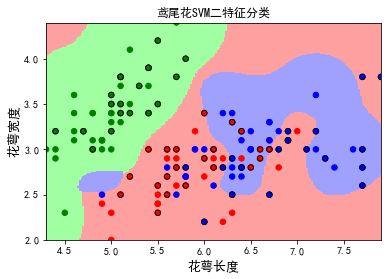

In [56]:
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light) # 根据颜色绘制网格，即将坐标系下的点都进行一个分类。
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], s=30, cmap=cm_dark) # 绘制样本点
# edgecolors设置边框颜色，有了边框颜色，点会更加明显
# zorder设置图形的层级
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label[:, 0], s=30, edgecolors='k', zorder=2, cmap=cm_dark) # 测试集样本点
plt.xlabel('花萼长度', fontsize=13)  
plt.ylabel('花萼宽度', fontsize=13)  
plt.xlim(x1_min,x1_max)  
plt.ylim(x2_min,x2_max)  
plt.title('鸢尾花SVM二特征分类')  
plt.show() 